In [25]:
%qtconsole

In [13]:
# import aiohttp        
# import aiofiles
import tempfile
from bson.objectid import ObjectId
from pathlib import Path
import pandas as pd
from typing import Tuple, List
import asyncio

In [21]:
#hide
from utils import *
from fastai2.vision.widgets import *

In [94]:
datasets = Path('datasets')
if not datasets.exists():
    datasets.mkdir()

In [95]:
df = pd.read_csv('datasets/dish_labels.csv')
df.head()

,Unnamed: 0,user_id,label,did,uid,dish_id,percentage
0,0,1,beer,5e11553b0f38c306c26466d2,4de1aa9d64525d13d600001f,1214,0.7
1,1,1,beer,5e0825e660bb28069fb29e4d,4de1aa9d64525d13d600001f,1395,0.7
2,2,1,beer,5e082592af3c0f06b0365ea5,4de1aa9d64525d13d600001f,1396,0.7
3,3,1,beer,5e4b2254c2b48f06cfc71796,4de1aa9d64525d13d600001f,787,0.7
4,4,1,beer,5e48cb380183b006df62e47d,4de1aa9d64525d13d600001f,857,0.7


In [96]:
len(df)

5981

In [15]:
datafolder = datasets/'dish_alcohol'

In [99]:

MAX_PICS = 10 # len(df)

for label in df['label'].unique():
    category_dir = datafolder/label
    if not category_dir.exists():
        category_dir.mkdir()
    urls = [f"https://snpd-tokyo-user-dish-img.s3-ap-northeast-1.amazonaws.com/{did}.jpg" 
            for did in df.set_index('label').loc[label, 'did'].values]

    with tempfile.TemporaryDirectory() as d:
        d = Path(d)
        url_file = d/'urls.txt'
        url_file.write("\n".join(urls))
        download_images(category_dir, url_file, max_pics=MAX_PICS)

/var/folders/zw/_69x1pd91rnb4zm589hnr8vw0000gn/T/tmpen21nw_a


/var/folders/zw/_69x1pd91rnb4zm589hnr8vw0000gn/T/tmpt999m7a3


/var/folders/zw/_69x1pd91rnb4zm589hnr8vw0000gn/T/tmpdivqskbn


/var/folders/zw/_69x1pd91rnb4zm589hnr8vw0000gn/T/tmpwz_gs_x3


/var/folders/zw/_69x1pd91rnb4zm589hnr8vw0000gn/T/tmpw40c4azj


/var/folders/zw/_69x1pd91rnb4zm589hnr8vw0000gn/T/tmp6bqk0oem


In [111]:
dishes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128), 
    batch_tfms=aug_transforms(mult=2))

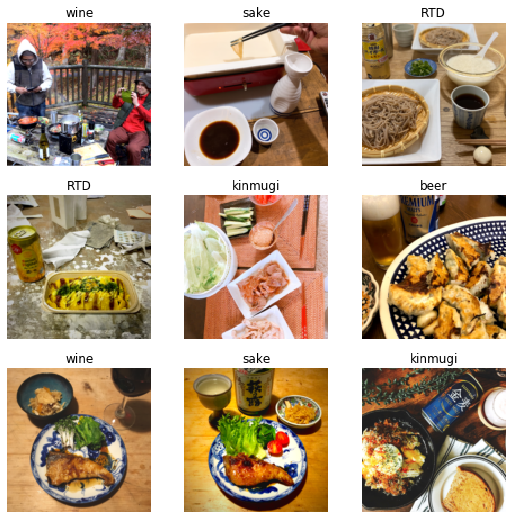

In [112]:
dishes_dls = dishes.dataloaders(datafolder)
dishes_dls.valid.show_batch()

In [114]:
learn = cnn_learner(dishes_dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/halfdan/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,nan,3.393236,0.722222,00:06


/Users/halfdan/.pyenv/versions/3.7.3/lib/python3.7/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,3.393236,0.722222,00:06
1,nan,3.393236,0.722222,00:06
2,nan,3.393236,0.722222,00:06
3,nan,3.393236,0.722222,00:06
